In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/LIKHIT GRANDHE - Crop_recommendation.csv")

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
x=df.groupby("label")


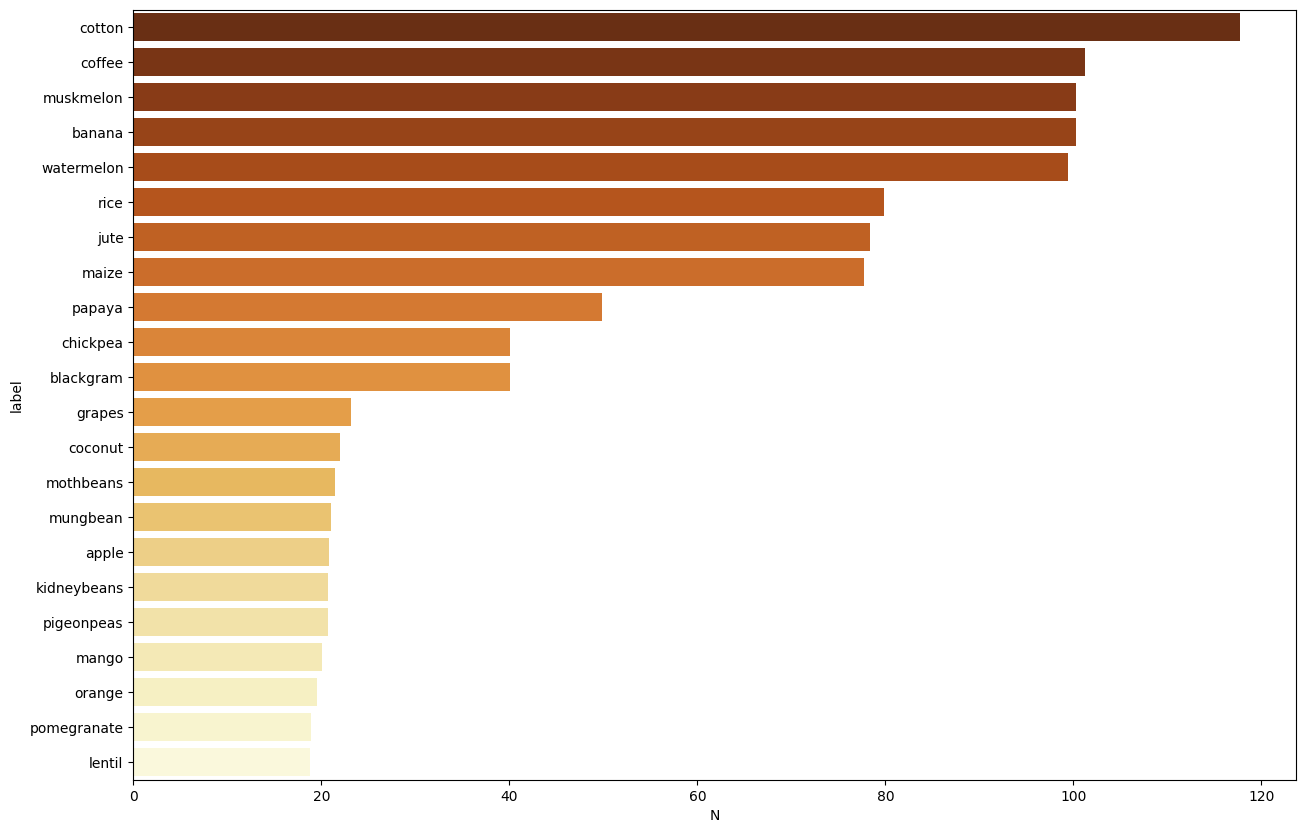

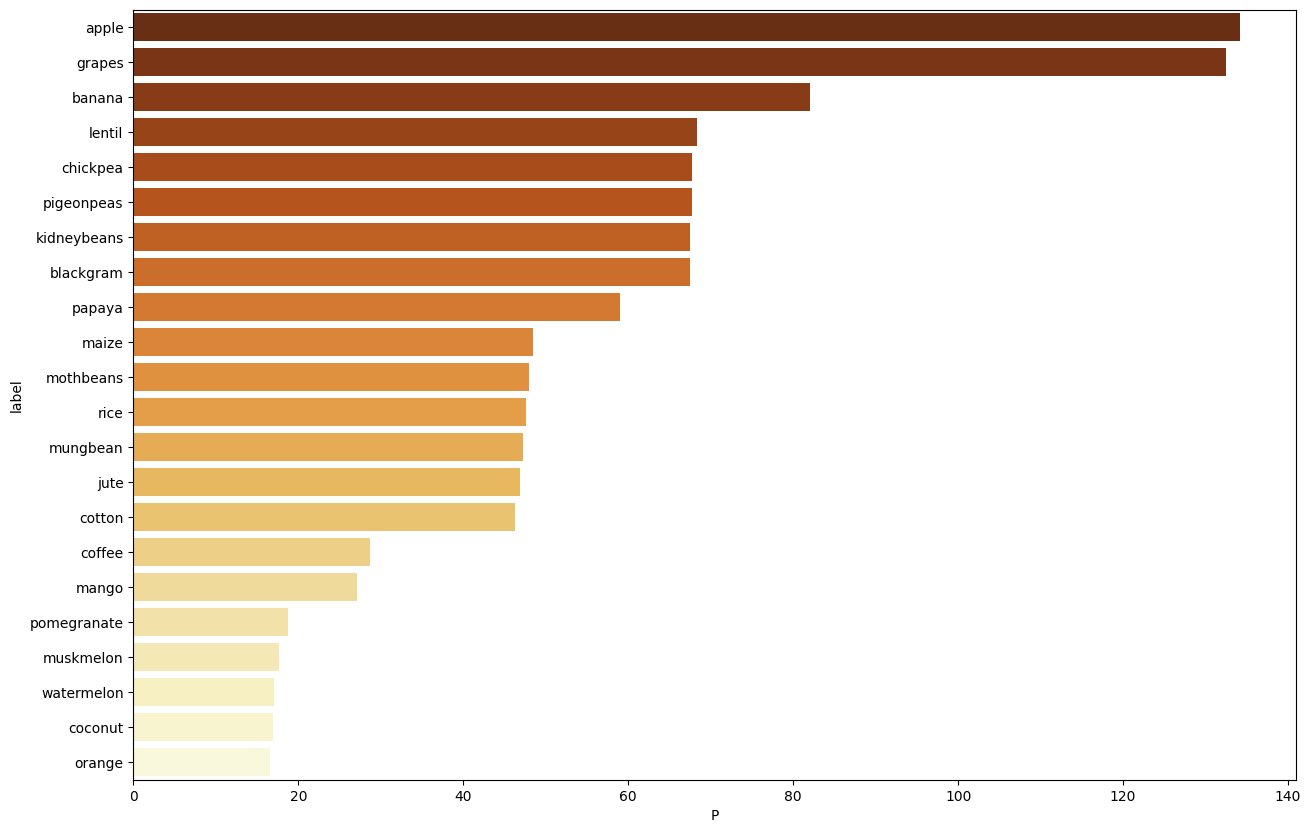

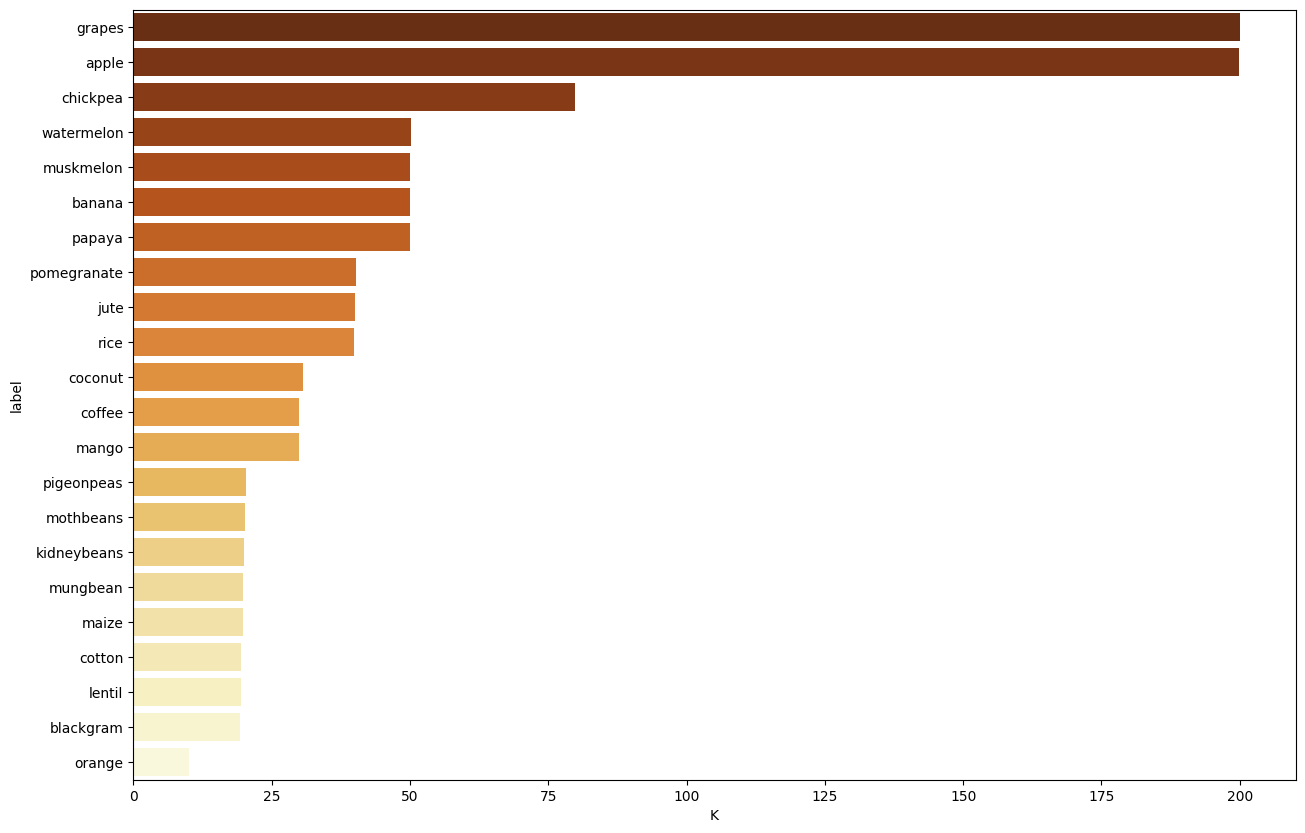

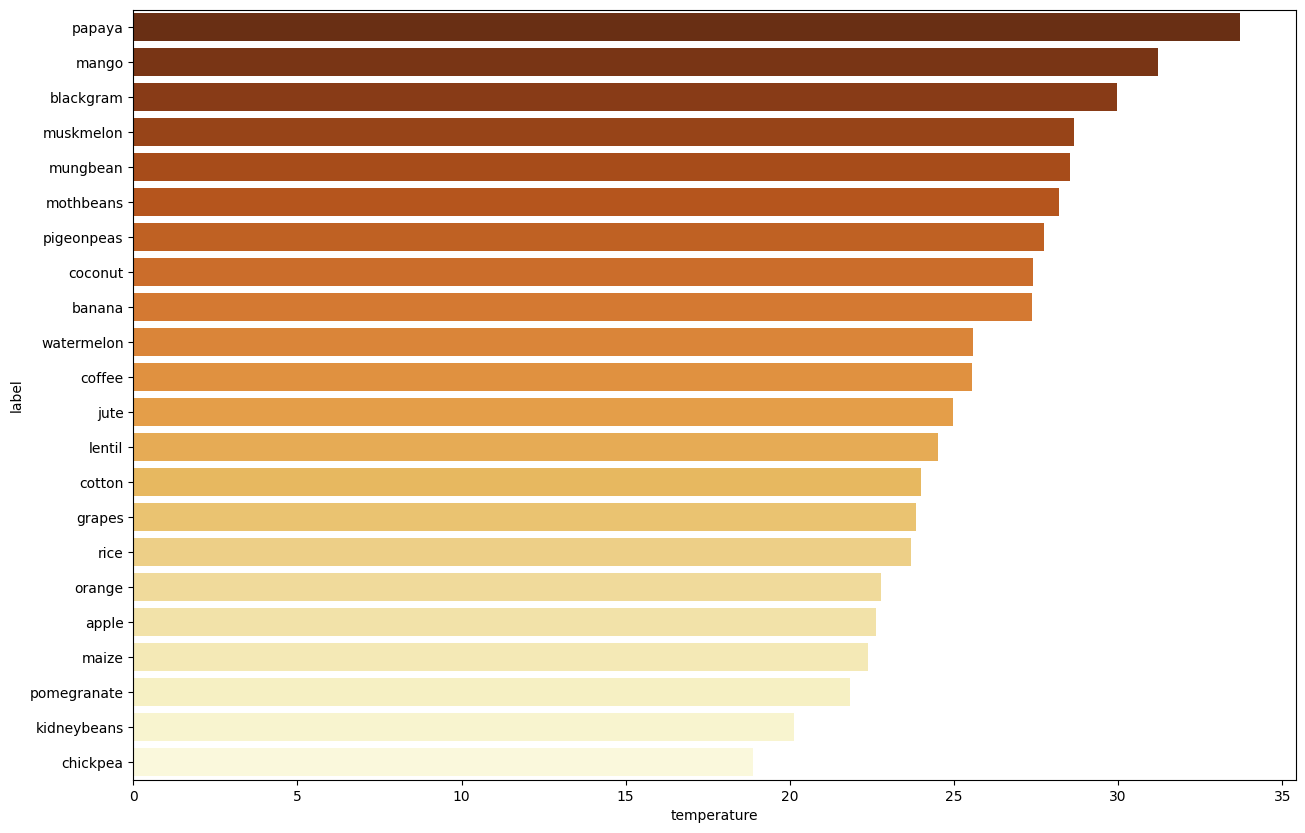

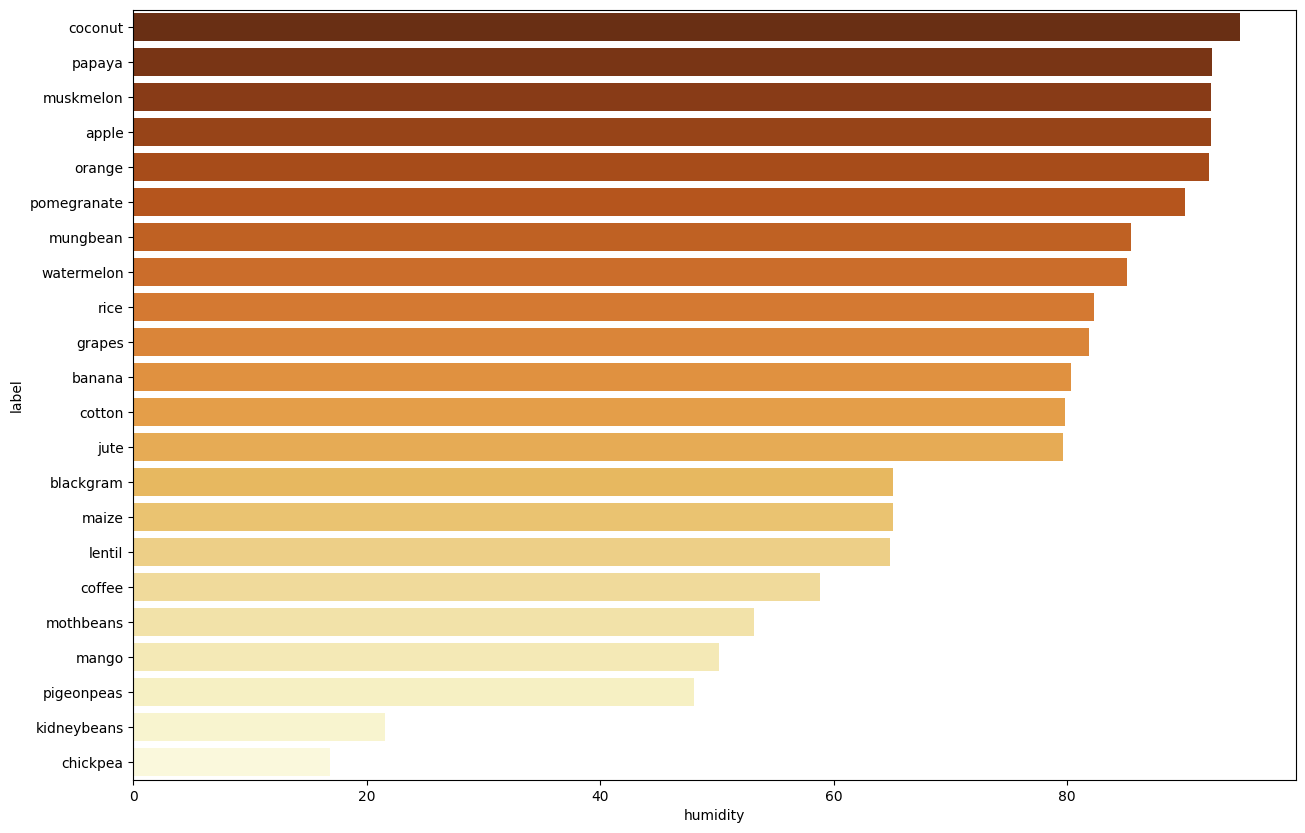

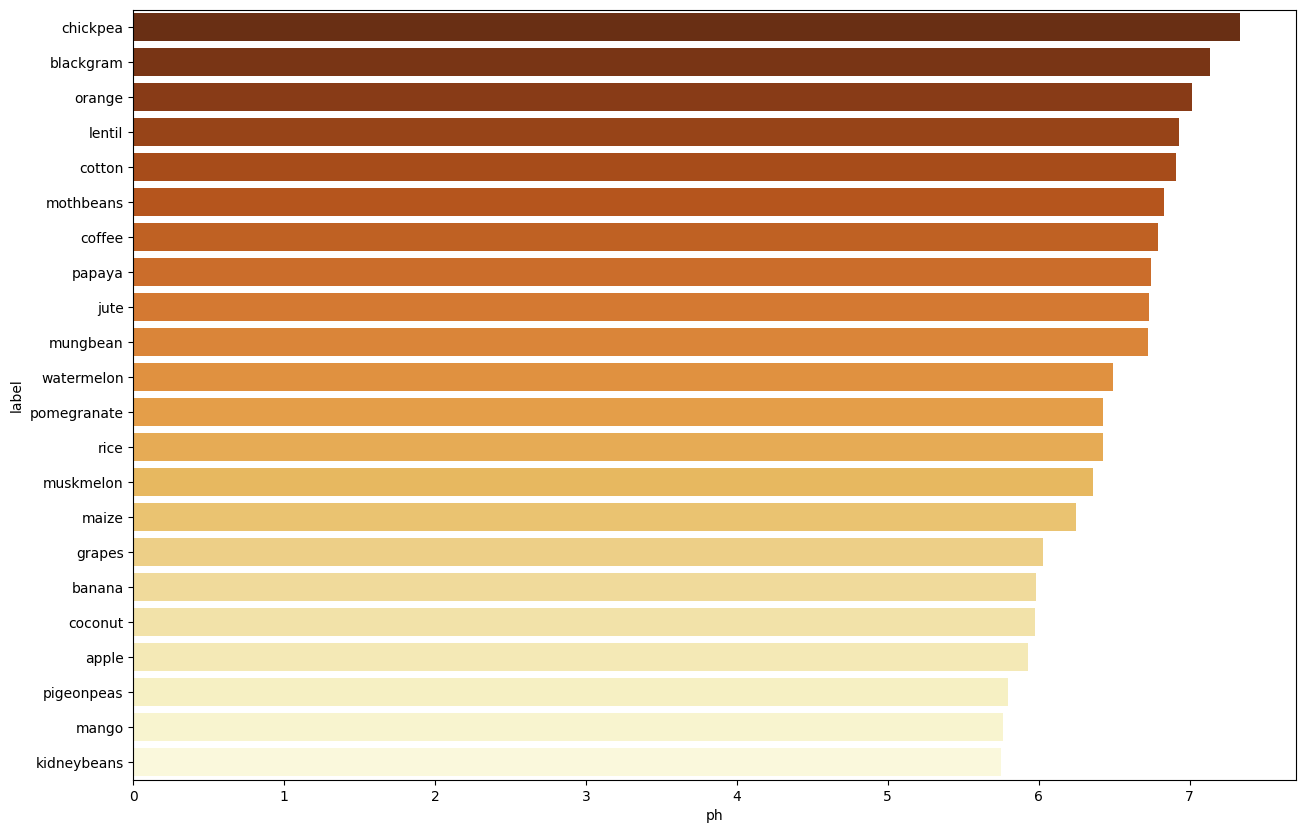

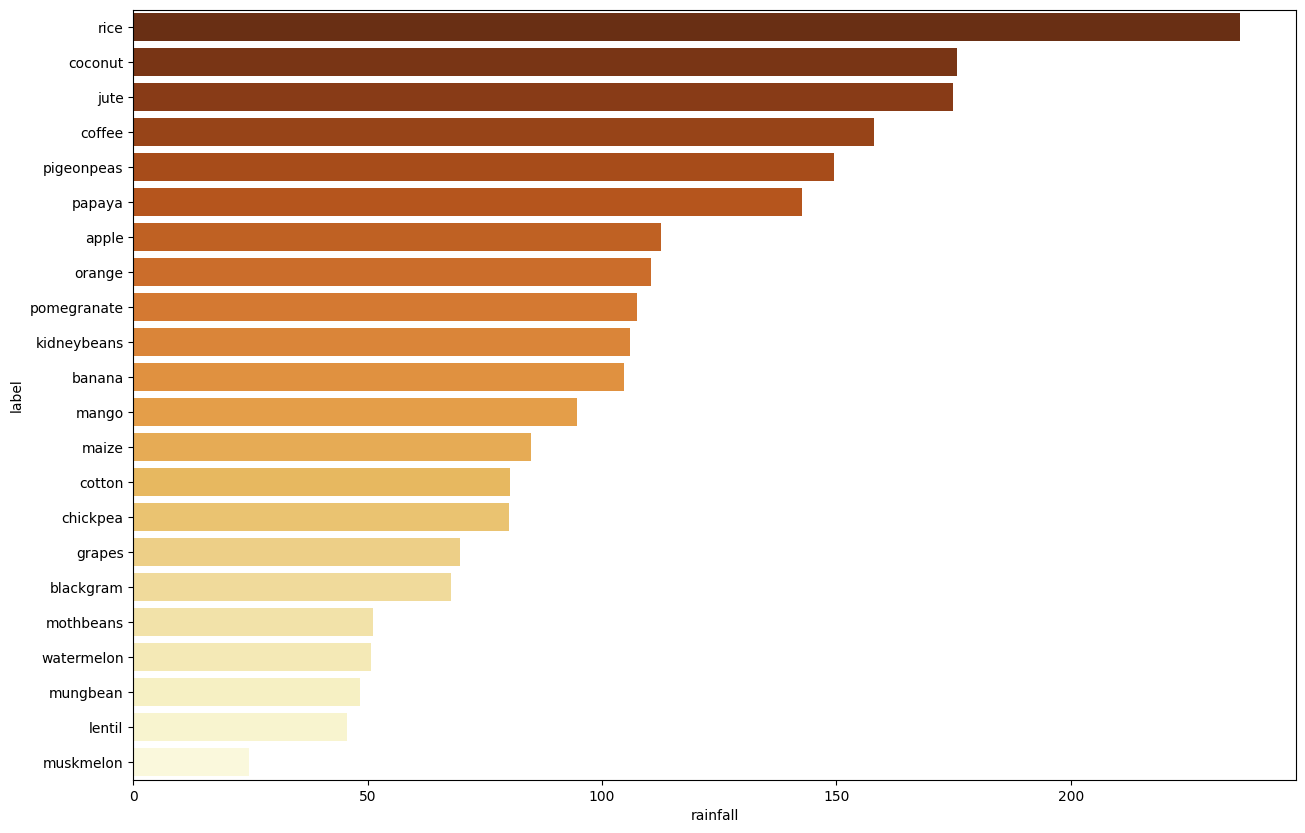

In [ ]:

for i in x.mean().columns:
  plt.figure(figsize=(15,10))
  sns.barplot(x=i,data=x.mean().sort_values(i,ascending=False),y="label",orient="h",palette="YlOrBr_r",hue="label")
  plt.show()

Here are the conclusions we can draw from the graphs:

1. Cotton, coffee, and muskmelon require the highest nitrogen ratio in the soil, while orange, pomegranate, and lentil require the least. Apple and orange require a moderate amount.
2. Apples and grapes require the highest phosphorus ratio in the soil, while watermelon, coconut, and oranges require the least.
3. Grapes and apples require the highest potassium ratio, while oranges require the least.
4. Papaya requires the highest temperature for growth, while kidney beans and chickpeas require the least.
5. Coconut, papaya, and muskmelon require the highest humidity, while kidney beans and chickpeas require the least.
6. Chickpeas require the highest pH, while mango and kidney beans require the least. Most of the crops require a slightly acidic pH.
7. Rice requires the highest rainfall, while muskmelon requires the least.

<Axes: >

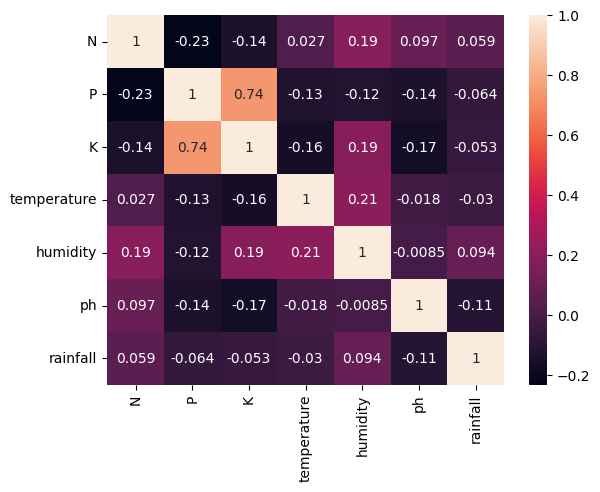

In [ ]:
sns.heatmap(df[df.columns[df.dtypes!="object"]].corr(),annot=True)

The ratios of phosphorus and potassium are highly correlated.The levels of phosphorus and potassium are strongly related.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:,0:7],df.iloc[:,7],test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 10]}


clf = DecisionTreeClassifier()


grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy')


grid_search.fit(xtrain, ytrain)


print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 10}
Best accuracy: 0.9823863636363637


Choosing a max_depth of 10 is the best option.

In [ ]:
import pickle


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10,random_state=0),
    'Naive Bayes': GaussianNB(),
    'SVM Classifier': SVC(random_state=0),
    'Random Forest Classifier': RandomForestClassifier(random_state=0),
    'Bagging Classifier': BaggingClassifier(random_state=0),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=0)
}

test_accuracies = []

for model_name, model in models.items():
    model.fit(xtrain, ytrain_encoded)
    ypred = model.predict(xtest)
    acc = accuracy_score(ytest_encoded, ypred)
    test_accuracies.append(acc)
    print(f"{model_name} - Test Set Accuracy: {acc * 100:.2f}%")



Decision Tree - Test Set Accuracy: 97.50%
Naive Bayes - Test Set Accuracy: 99.09%
SVM Classifier - Test Set Accuracy: 97.73%
Random Forest Classifier - Test Set Accuracy: 99.55%
Bagging Classifier - Test Set Accuracy: 98.41%
Gradient Boosting Classifier - Test Set Accuracy: 99.32%


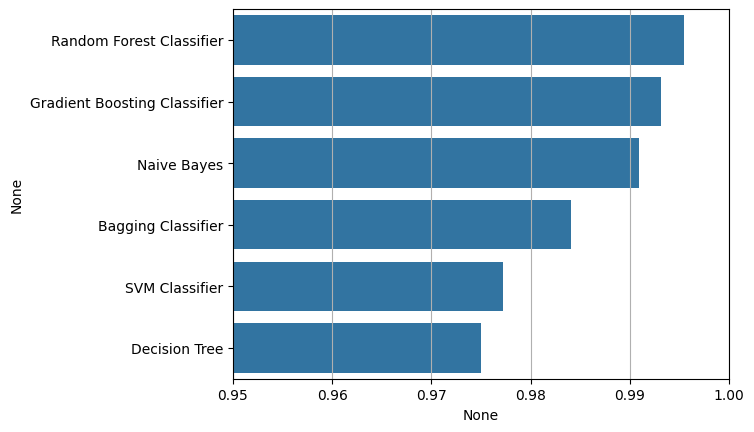

In [ ]:
x=pd.Series(test_accuracies)
x.index=models.keys()
x=x.sort_values(ascending=False)
sns.barplot(x=x, y=x.index, orient='h').set_xlim(0.95,1)
plt.grid(axis="x")

The Random Forest classifier has the highest accuracy.

In [ ]:
random_forest_model = models['Random Forest Classifier']

with open('model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)
    print("Random Forest model saved to model.pkl")

Random Forest model saved to model.pkl


In [ ]:
import pickle

pickle_filename = 'model.pkl'

with open(pickle_filename, 'rb') as file:
    models = pickle.load(file)

loaded_model = models
y_pred = loaded_model.predict(xtest)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
print('Predictions (decoded):\n', y_pred_decoded)



Predictions (decoded):
 ['coffee' 'pomegranate' 'pomegranate' 'cotton' 'mungbean' 'coffee'
 'watermelon' 'coconut' 'pigeonpeas' 'mango' 'chickpea' 'jute' 'papaya'
 'mothbeans' 'mango' 'maize' 'orange' 'blackgram' 'cotton' 'orange'
 'banana' 'kidneybeans' 'muskmelon' 'banana' 'mango' 'kidneybeans'
 'coconut' 'coconut' 'jute' 'mungbean' 'pomegranate' 'chickpea' 'mungbean'
 'mungbean' 'mothbeans' 'coffee' 'cotton' 'muskmelon' 'blackgram'
 'blackgram' 'papaya' 'pomegranate' 'pomegranate' 'jute' 'mothbeans'
 'pomegranate' 'pomegranate' 'mungbean' 'coffee' 'chickpea' 'coffee'
 'blackgram' 'cotton' 'pigeonpeas' 'cotton' 'lentil' 'mungbean' 'banana'
 'lentil' 'orange' 'jute' 'jute' 'pigeonpeas' 'grapes' 'pigeonpeas'
 'grapes' 'grapes' 'pomegranate' 'coffee' 'maize' 'apple' 'orange'
 'chickpea' 'mango' 'banana' 'maize' 'banana' 'jute' 'pomegranate'
 'mungbean' 'mango' 'banana' 'rice' 'mothbeans' 'banana' 'muskmelon'
 'orange' 'maize' 'maize' 'coconut' 'rice' 'orange' 'mango' 'orange'
 'orange' 